In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

In [60]:
def position_mapping(x):
    if 'C' in x:
        return 'Center'
    elif 'F' in x:
        return 'Forward'
    elif 'G' in x:
        return 'Guard'

In [61]:
data = pd.read_csv('./../../data/player_seasonal_stats_advanced.csv')
data['Position'] = data['Pos'].apply(lambda x: position_mapping(x))
data = data[['Player', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%','OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Position']]
data['Player'] = data['Player'].apply(lambda x: x.replace('*', ''))
print(data.shape[0], 'rows')
data = data.drop_duplicates(subset=['Player'], keep='last').reset_index(drop=True)
print(data.shape[0], 'rows')
data

11526 rows
2337 rows


,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Position
0,Chris Anstey,25,73,1007,15.1,0.512,0.016,0.404,10.3,22.5,...,23.1,0.6,1.3,1.9,0.090,-2.1,-0.1,-2.3,-0.1,Center
1,B.J. Armstrong,32,27,583,10.7,0.510,0.156,0.134,0.4,9.2,...,18.6,0.2,0.2,0.4,0.030,-1.8,-2.0,-3.8,-0.3,Guard
2,Anthony Avent,30,49,377,5.5,0.368,0.000,0.333,6.6,15.6,...,15.8,-0.7,0.2,-0.5,-0.065,-6.9,-0.5,-7.4,-0.5,Forward
3,Toby Bailey,24,46,449,10.8,0.483,0.071,0.464,6.6,11.2,...,18.9,0.2,0.6,0.8,0.088,-3.0,-0.1,-3.1,-0.1,Guard
4,Charles Barkley,36,20,620,19.8,0.534,0.117,0.495,13.1,24.4,...,22.3,1.3,0.6,1.9,0.148,2.6,-0.6,2.0,0.6,Forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332,Thaddeus Young,34,54,795,14.1,0.573,0.172,0.131,9.4,14.6,...,13.5,0.7,1.1,1.8,0.109,-1.8,1.9,0.1,0.4,Forward
2333,Trae Young,24,73,2541,22.0,0.573,0.331,0.460,2.4,7.0,...,32.6,5.3,1.4,6.7,0.126,5.3,-2.0,3.3,3.4,Guard
2334,Omer Yurtseven,24,9,83,16.7,0.675,0.259,0.222,10.9,21.9,...,18.0,0.2,0.1,0.3,0.159,-2.5,-1.5,-3.9,0.0,Center
2335,Cody Zeller,30,15,217,16.4,0.659,0.034,0.593,13.0,21.8,...,18.1,0.4,0.3,0.7,0.147,-2.0,-0.7,-2.8,0.0,Center


In [62]:
players_with_shoes = pd.read_csv('./../../data/player-shoes-data.csv')
df_train = data[~data['Player'].isin(players_with_shoes['Player'])]
df_test = data[data['Player'].isin(players_with_shoes['Player'])]
# fill nan values
for col in df_train.columns[1:-1]:
    df_train.loc[:,col] = df_train.loc[:,col].fillna(df_train[col].median())
    df_test.loc[:,col] = df_test.loc[:,col].fillna(df_test[col].median())
X_train = df_train.iloc[:,1:-1].values
y_train = df_train.iloc[:,-1].values
X_test = df_test.iloc[:,1:-1].values
y_test = df_test.iloc[:,-1].values
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1971, 23) (366, 23) (1971,) (366,)


In [68]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(accuracy_score(y_test, y_pred))
# print(mean_squared_error(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=list(data['Position'].unique())))


0.45901639344262296
              precision    recall  f1-score   support

      Center       0.36      0.38      0.37        74
       Guard       0.44      0.57      0.49       145
     Forward       0.57      0.39      0.47       147

    accuracy                           0.46       366
   macro avg       0.46      0.45      0.44       366
weighted avg       0.48      0.46      0.46       366



In [69]:
rf = RandomForestClassifier(max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=list(data['Position'].unique())))

0.7486338797814208
              precision    recall  f1-score   support

      Center       0.81      0.69      0.74        74
       Guard       0.67      0.71      0.69       145
     Forward       0.80      0.82      0.81       147

    accuracy                           0.75       366
   macro avg       0.76      0.74      0.75       366
weighted avg       0.75      0.75      0.75       366



In [70]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=list(data['Position'].unique())))

0.7240437158469946
              precision    recall  f1-score   support

      Center       0.71      0.72      0.71        74
       Guard       0.67      0.67      0.67       145
     Forward       0.78      0.78      0.78       147

    accuracy                           0.72       366
   macro avg       0.72      0.72      0.72       366
weighted avg       0.72      0.72      0.72       366



In [71]:
clf = LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=list(data['Position'].unique())))

0.7295081967213115
              precision    recall  f1-score   support

      Center       0.82      0.50      0.62        74
       Guard       0.64      0.73      0.68       145
     Forward       0.80      0.84      0.82       147

    accuracy                           0.73       366
   macro avg       0.75      0.69      0.71       366
weighted avg       0.74      0.73      0.73       366



/Users/sejaldua/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


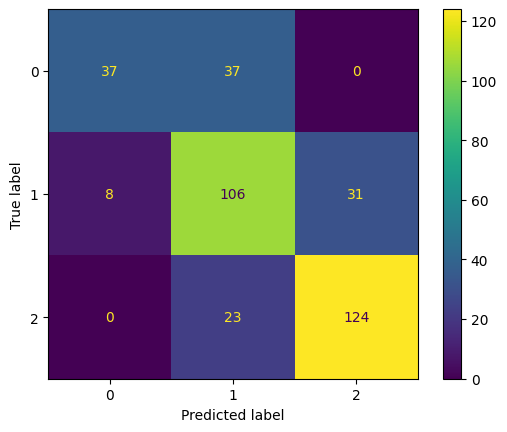

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()